## Set-up

In [ ]:
#PRIOR TO DELIVERY, RUN THIS CELL AND THEN DELETE IT (esc, D, D)
%matplotlib inline

In [1]:
# Import libraries
import quandl
import matplotlib.pyplot as plt
import datetime

# Set-up Quandl configuration
quandl.ApiConfig.api_key = "Byjzu4U8rmR1iEhZnp7V"

## Load data

In [2]:
# Request data
data = quandl.get("BCB/UDJIAD1") #Dow Jones Industrial Average

In [3]:
# Inspect data
data.tail()

,Value
Date,
2016-04-11,17556.41
2016-04-12,17721.25
2016-04-13,17908.28
2016-04-14,17926.43
2016-04-15,17897.46


<AxesSubplot:xlabel='Date', ylabel='value'>

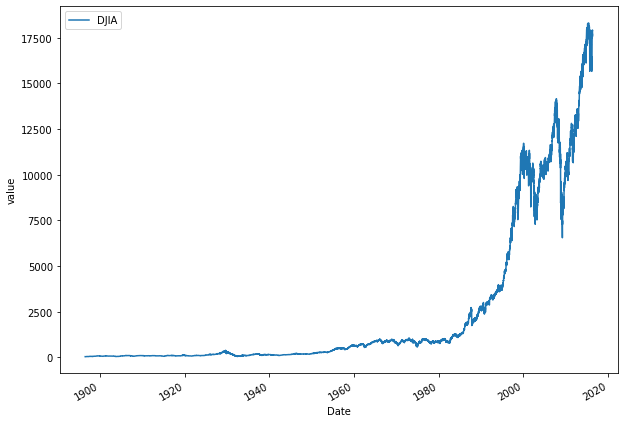

In [5]:
# Rename header
data.columns = ["DJIA"]

# Generate plot
data.plot(figsize=(10,7.5), ylabel = "value")

## Process data

(0.0, 25000.0)

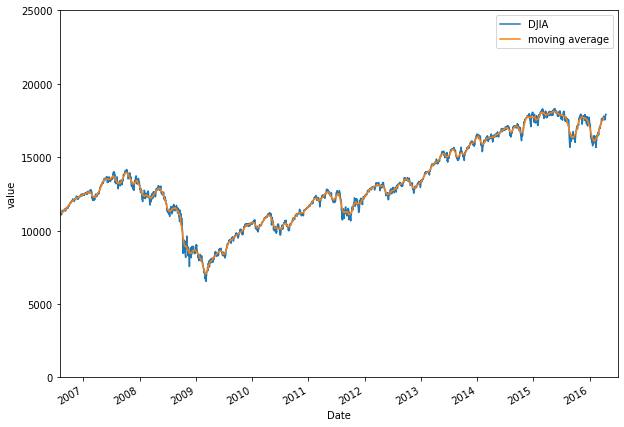

In [8]:
# Overlay rolling average
data["moving average"] = data.rolling(21,center=True).mean()
data.plot(figsize=(10,7.5), ylabel = "value")

# Restrict view
start_date = datetime.date(2006, 8, 1)
end_date = datetime.date(2016, 7, 1)
plt.xlim([start_date, end_date])
plt.ylim(0,25000)

(0.0, 25000.0)

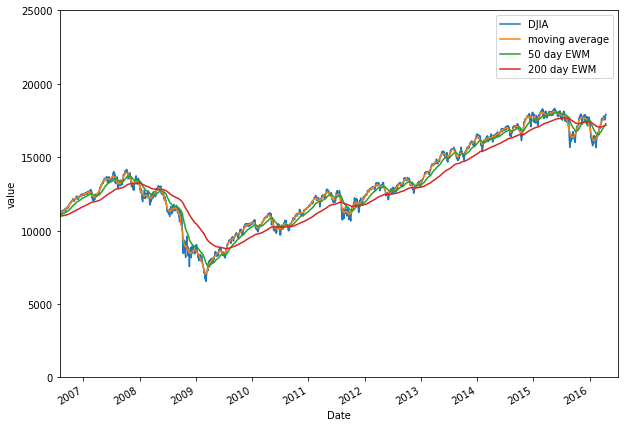

In [10]:
# Overlay exponentially weighted functions 
data["50 day EWM"] = data["DJIA"].ewm(span=50).mean()
data["200 day EWM"] = data["DJIA"].ewm(span=200).mean()
data.plot(figsize=(10,7.5), ylabel = "value")

# Restrict view
start_date = datetime.date(2006, 8, 1)
end_date = datetime.date(2016, 7, 1)
plt.xlim([start_date, end_date])
plt.ylim(0,25000)

## Model data

In [17]:
# Import FB Prophet
from fbprophet import Prophet

In [27]:
# Create subset
data_sub = data["2016-01-01":]
data_sub

,DJIA,moving average,50 day EWM,200 day EWM
Date,,,,
2016-01-04,17148.94,16964.296190,17473.251584,17408.800360
2016-01-05,17158.66,16881.958095,17460.914660,17406.311401
2016-01-06,16906.51,16822.630952,17439.173300,17401.338253
2016-01-07,16514.10,16767.482857,17402.895916,17392.510012
2016-01-08,16346.45,16694.528095,17361.466664,17382.101454
...,...,...,...,...
2016-04-11,17556.41,NaN,17180.755778,17141.674769
2016-04-12,17721.25,NaN,17201.951630,17147.441687
2016-04-13,17908.28,NaN,17229.650782,17155.012218


In [16]:
# Get the data in the format that fbprophet wants it
data_forecast = data_sub.reset_index()
data_forecast = data_forecast[["Date", "DJIA"]].rename(columns={"Date": "ds", "DJIA": "y"})

,ds,y
0,1896-07-14,33.43
1,1896-07-15,32.28
2,1896-07-16,31.95
3,1896-07-17,31.94
4,1896-07-18,31.50
...,...,...
32596,2016-04-11,17556.41
32597,2016-04-12,17721.25
32598,2016-04-13,17908.28
32599,2016-04-14,17926.43


In [19]:
# Fit Prophet model
m = Prophet()
m.fit(data_forecast)
future = m.make_future_dataframe(periods=int(3*365))
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [20]:
# Inspect forecast
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1896-07-14,42.116498,-854.008174,955.170504,42.116498,42.116498,13.235836,13.235836,13.235836,-0.562592,-0.562592,-0.562592,13.798428,13.798428,13.798428,0.0,0.0,0.0,55.352333
1,1896-07-15,42.131607,-932.146643,1013.399008,42.131607,42.131607,13.521534,13.521534,13.521534,-0.352006,-0.352006,-0.352006,13.873540,13.873540,13.873540,0.0,0.0,0.0,55.653141
2,1896-07-16,42.146716,-889.813866,1015.026625,42.146716,42.146716,15.078909,15.078909,15.078909,1.218910,1.218910,1.218910,13.860000,13.860000,13.860000,0.0,0.0,0.0,57.225625
3,1896-07-17,42.161825,-883.671481,975.851852,42.161825,42.161825,14.855363,14.855363,14.855363,1.097995,1.097995,1.097995,13.757368,13.757368,13.757368,0.0,0.0,0.0,57.017188
4,1896-07-18,42.176934,-864.666969,988.984402,42.176934,42.176934,13.990252,13.990252,13.990252,0.423569,0.423569,0.423569,13.566682,13.566682,13.566682,0.0,0.0,0.0,56.167185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33691,2019-04-11,17609.691202,16702.787032,18584.331190,17580.547247,17640.315901,27.936962,27.936962,27.936962,1.218910,1.218910,1.218910,26.718053,26.718053,26.718053,0.0,0.0,0.0,17637.628164
33692,2019-04-12,17611.082108,16707.131612,18624.356886,17581.883927,17641.781701,28.143581,28.143581,28.143581,1.097995,1.097995,1.097995,27.045585,27.045585,27.045585,0.0,0.0,0.0,17639.225689
33693,2019-04-13,17612.473015,16678.824960,18633.290181,17583.220615,17643.247501,27.861835,27.861835,27.861835,0.423569,0.423569,0.423569,27.438266,27.438266,27.438266,0.0,0.0,0.0,17640.334850
33694,2019-04-14,17613.863921,16597.701298,18445.610503,17584.557304,17644.702623,23.567375,23.567375,23.567375,-4.333137,-4.333137,-4.333137,27.900512,27.900512,27.900512,0.0,0.0,0.0,17637.431296


(13361.0, 18078.0)

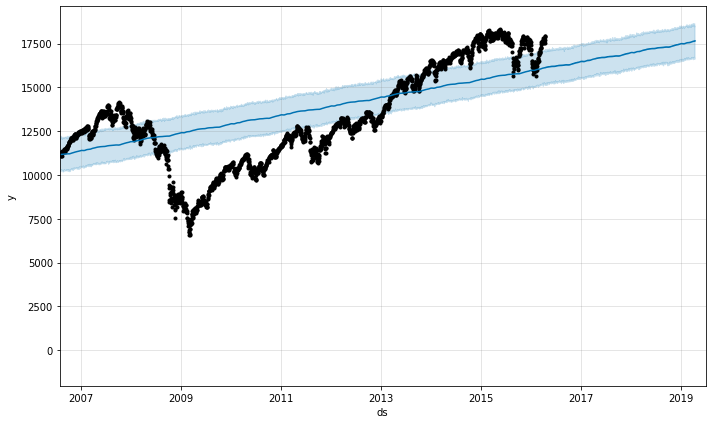

In [21]:
# Plot forecast
m.plot(forecast)
plt.xlim([datetime.date(2006, 8, 1), datetime.date(2019, 7, 1)])

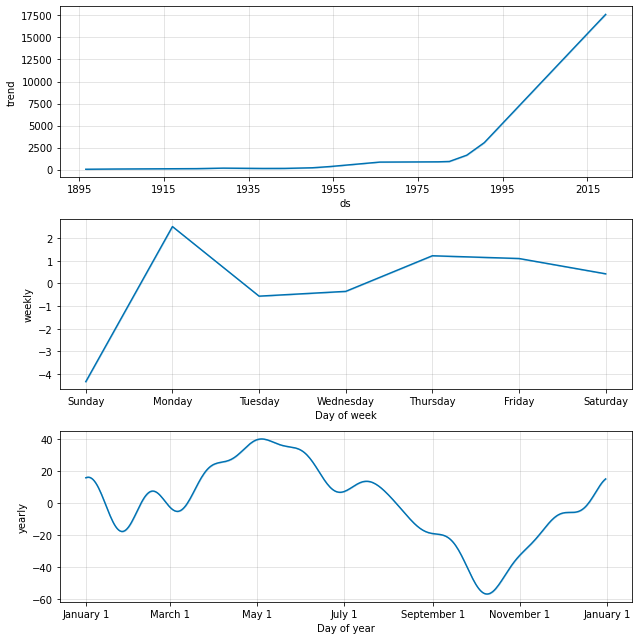

In [23]:
# Plot decomposition
m.plot_components(forecast);